In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('heart.csv')

In [4]:
data.isnull().sum() #check for missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data_dup=data.duplicated().any() #drop duplicate values

In [7]:
data_dup

True

In [67]:
data = data.drop_duplicates()

In [9]:
data_dup=data.duplicated().any()

In [10]:
data_dup

False

### Data Processing

In [12]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [13]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [16]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Encoding Categorical Data

In [17]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [20]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [21]:
cate_val.remove('sex')
cate_val.remove('target')
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [22]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [28]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


### Train/Test Split

In [96]:
X = data.drop('target', axis=1)
y = data['target']

In [31]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [36]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
281,-2.149959,1,-0.547650,-1.054817,1.068439,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
479,0.396267,1,-0.205463,-0.590310,-0.812118,0.997780,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
25,0.728383,0,0.764066,1.170944,-0.156110,-0.037124,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
652,1.281911,0,1.049221,-0.396766,-1.555593,1.342748,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
566,-0.489377,0,-1.232023,0.145158,0.412431,-0.899544,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
328,1.724733,1,-0.091401,1.461260,-1.774263,1.170264,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
337,-0.046555,1,-0.376556,0.512893,0.106294,-0.468334,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False


### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred1 = log.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,y_pred1)

0.9016393442622951

### SVC

In [43]:
from sklearn import svm

In [44]:
svm = svm.SVC()

In [45]:
svm.fit(X_train,y_train)

SVC()

In [46]:
y_pred2 = svm.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred2)

0.8852459016393442

### KNeighbors Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [53]:
y_pred3 = knn.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred3)

0.8524590163934426

In [58]:
#Finding a better accuracy score for knn

score = []

for k in range (1,10):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [59]:
score

[0.7377049180327869,
 0.8032786885245902,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934]

In [61]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8688524590163934

### Non-Linear ML Algorithms

In [64]:
data = data.drop_duplicates()

In [65]:
data.shape

(302, 14)

In [70]:
X = data.drop('target',axis=1)
y=data['target']

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

### Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt = DecisionTreeClassifier()

In [74]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [75]:
y_pred4 = dt.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred4)

0.7049180327868853

### Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier()

In [79]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
y_pred5 = rf.predict(X_test)

In [81]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

### Gradient Boosting Classifier

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
gbc = GradientBoostingClassifier()

In [84]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [85]:
y_pred6 = gbc.predict(X_test)

In [86]:
accuracy_score(y_test,y_pred6)

0.7868852459016393

In [90]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3),
                                 accuracy_score(y_test,y_pred4),
                                 accuracy_score(y_test,y_pred5),
                                 accuracy_score(y_test,y_pred6),]})

In [91]:
final_data

,Models,ACC
0,LR,0.901639
1,SVM,0.885246
2,KNN,0.852459
3,DT,0.704918
4,RF,0.836066
5,GB,0.786885


In [92]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

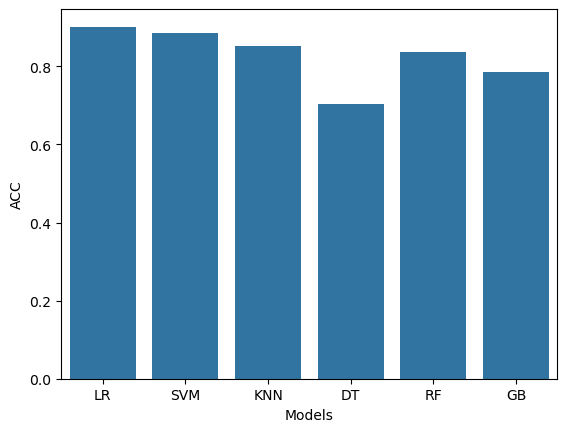

In [95]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

In [97]:
X = data.drop('target', axis=1)
y = data['target']

In [98]:
X.shape

(302, 13)

In [104]:
from sklearn.linear_model import LogisticRegression

In [110]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log = LogisticRegression() 
log.fit(X_scaled, y)

LogisticRegression()

### Save Model

In [111]:
import joblib 

In [114]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [115]:
model = joblib.load('model_joblib_heart')

### GUI

In [116]:
from tkinter import *
import joblib

In [ ]:
def show_entry():
    try:
        # Extract all values from entries
        values = [float(entries[i].get()) for i in range(13)]
        
        # Predict using the preloaded model
        result = model.predict([values])
        
        # Display the result
        if result == 0:
            messagebox.showinfo("Prediction Result", "No Heart Diseases")
        else:
            messagebox.showinfo("Prediction Result", "Possibility of Heart Diseases")
    
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numerical values.")

model = joblib.load('model_joblib_heart')

master = Tk()
master.title("Heart Disease Prediction")

labels = [
    'Enter Your Age', 
    'Male or Female [1/0]', 
    'Chest Pain Type [0-4]',
    'Resting Blood Pressure', 
    'Serum Cholesterol in mg/dl',
    'Fasting Blood Sugar (> 120 mg/dl)', 
    'Resting Electrocardiographic Results [0-2]',
    'Maximum Heart Rate Achieved', 
    'Exercise Induced Angina', 
    'Oldpeak (ST Depression)',
    'The Slope of the Peak Exercise ST Segment', 
    'Number of Major Vessels (0-3) Colored by Fluoroscopy',
    'Thal: 0 = Normal; 1 = Fixed Defect; 2 = Reversible Defect'
]

entries = {}

for i, label_text in enumerate(labels):
    Label(master, text=label_text).grid(row=i, column=0, padx=10, pady=5, sticky="e")
    entry = Entry(master)
    entry.grid(row=i, column=1, padx=10, pady=5)
    entries[i] = entry

Button(master, text='Predict', command=show_entry).grid(row=len(labels), columnspan=2, pady=10)

master.mainloop()


C:\Users\Diran\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Diran\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
